In [50]:
import csv
import sys
import os
import pickle
import random
import numpy as np
import time
import operator
import seaborn as sns
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from collections import Counter

import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.api as sm

import scipy.stats
from scipy.stats import entropy
from scipy.stats import spearmanr, pearsonr
from scipy.stats import zscore

# import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.utils import shuffle
# from sklearn.model_selection import cross_val_score, KFold

# import xgboost as xgb
# import shap

In [51]:
import warnings
warnings.filterwarnings('once')

In [52]:
sys.path.append('../python')
from permutation import permutation, compute_alignment_strength
from utils.utils_funcs import get_variance, get_distinctness, get_distinctness_from_nearest_5, aggregate_embeddings_visual_and_language
from utils.utils_funcs import load_data_to_dict

In [53]:
# def combine_nouns_and_verbs(struct1,struct2):
#     words_full=list()
#     embeds_full=dict()
#     for w in struct1["embeds"]:
#         ww=w+"_n"
#         temp=dict()
#         temp["visual"]=struct1["embeds"][w]["visual"]
#         temp["language"]=struct1["embeds"][w]["language"]
#         embeds_full[ww]=temp
#         words_full.append(ww)
#     for w in struct2["embeds"]:
#         ww=w+"_v"
#         temp=dict()
#         temp["visual"]=struct2["embeds"][w]["visual"]
#         temp["language"]=struct2["embeds"][w]["language"]
#         embeds_full[ww]=temp
#         words_full.append(ww)
#     data_full=dict(
#         embeds=embeds_full,
#         words=words_full
#     )
#     return data_full

In [54]:
def get_concept_level_alignment_strength(struct,concepts,targets):
    visual_embeddings_list=list()
    langauge_embeddings_list=list()
    for concept in concepts:
        embeddings=struct["embeds"][concept]
        visual_embeddings_list.append(embeddings["visual"])
        langauge_embeddings_list.append(embeddings["language"])
    z_0=np.array(visual_embeddings_list)
    z_1=np.array(langauge_embeddings_list)
    sim_z_0=cosine_similarity(z_0)
    sim_z_1=cosine_similarity(z_1)
    rt=list()
    for target in targets:
        idx=concepts.index(target)
        aln=spearmanr(sim_z_0[idx],sim_z_1[idx])[0]
        if aln>0:
            rt.append(aln)
        else:
            rt.append(0)
    return rt

In [55]:
# def combine_all_data(data,aoa_dict,v_var_dict,l_var_dict,v_dist_dict,l_dist_dict,freq_dict):
#     aoas=list()
#     v_vars=list()
#     l_vars=list()
#     v_dists=list()
#     l_dists=list()
#     freqs=list()
    
#     intersect_concepts=list()
#     for concept in aoa_dict:
#         if concept not in freq_dict:
#             print(concept)
#         elif concept in data['words']:
#             aoas.append(aoa_dict[concept])
#             v_vars.append(v_var_dict[concept])
#             l_vars.append(l_var_dict[concept])
#             v_dists.append(v_dist_dict[concept])
#             l_dists.append(l_dist_dict[concept])
#             freqs.append(freq_dict[concept])
#             intersect_concepts.append(concept)
#     alignments=get_concept_level_alignment_strength(data,data['words'],intersect_concepts)
#     return aoas,alignments,v_vars,l_vars,v_dists,l_dists,freqs

-----

In [56]:
vg_noun_data=pickle.load(open("../data/dumped_embeddings_replication/vg_noun_least20_ll_swav_bert_20.pkl","rb"))
vg_verb_data=pickle.load(open("../data/dumped_embeddings_replication/vg_verb_least20_ll_swav_bert_20.pkl","rb"))

aggregated_vg_noun_data=aggregate_embeddings_visual_and_language(vg_noun_data,20,20)
aggregated_vg_verb_data=aggregate_embeddings_visual_and_language(vg_verb_data,20,20)

/var/folders/mq/9j63byws48l4bqktjyqnb5nh0000gp/T/ipykernel_40620/763373227.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='../data/dumped_embeddings_replication/vg_noun_least20_ll_swav_bert_20.pkl'>
  vg_noun_data=pickle.load(open("../data/dumped_embeddings_replication/vg_noun_least20_ll_swav_bert_20.pkl","rb"))
/var/folders/mq/9j63byws48l4bqktjyqnb5nh0000gp/T/ipykernel_40620/763373227.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='../data/dumped_embeddings_replication/vg_verb_least20_ll_swav_bert_20.pkl'>
  vg_verb_data=pickle.load(open("../data/dumped_embeddings_replication/vg_verb_least20_ll_swav_bert_20.pkl","rb"))


In [57]:
# vg_noun_data=pickle.load(open("../data/dumped_embeddings/vg_noun_swav_bert_window5_20.pkl","rb"))
# vg_verb_data=pickle.load(open("../data/dumped_embeddings/vg_verb_swav_bert_window5_20.pkl","rb"))

# aggregated_vg_noun_data=aggregate_embeddings_visual_and_language(vg_noun_data,20,20)
# aggregated_vg_verb_data=aggregate_embeddings_visual_and_language(vg_verb_data,20,20)

In [58]:
# vg_noun_data=pickle.load(open("../data/dumped_embeddings/vg_noun_ll_swav_bert_20.pkl","rb"))
# vg_verb_data=pickle.load(open("../data/dumped_embeddings/vg_verb_ll_swav_bert_20.pkl","rb"))

# aggregated_vg_noun_data=aggregate_embeddings_visual_and_language(vg_noun_data,20,20)
# aggregated_vg_verb_data=aggregate_embeddings_visual_and_language(vg_verb_data,20,20)

In [59]:
# vg_noun_data=pickle.load(open("../data/dumped_embeddings/vg_noun_concept_least20_swav_bert_20.pkl","rb"))
# vg_verb_data=pickle.load(open("../data/dumped_embeddings/vg_verb_concept_least20_swav_bert_20.pkl","rb"))

# aggregated_vg_noun_data=aggregate_embeddings_visual_and_language(vg_noun_data,20,20)
# aggregated_vg_verb_data=aggregate_embeddings_visual_and_language(vg_verb_data,20,20)

In [60]:
# vg_noun_data=pickle.load(open("../data/dumped_embeddings/vg_noun_concept_least20_swav_glove_20.pkl","rb"))
# vg_verb_data=pickle.load(open("../data/dumped_embeddings/vg_verb_concept_least20_swav_glove_20.pkl","rb"))

# aggregated_vg_noun_data=aggregate_embeddings_visual_and_language(vg_noun_data,20,1)
# aggregated_vg_verb_data=aggregate_embeddings_visual_and_language(vg_verb_data,20,1)

In [61]:
# vg_all_data=combine_nouns_and_verbs(vg_noun_data,vg_verb_data)
# aggregated_vg_all_data=aggregate_embeddings_visual_and_language(vg_all_data,20,20)

----

In [62]:
def construct_frame_of_embeddings(data):
    aggregated_data=aggregate_embeddings_visual_and_language(data,20,20)
    
    v_embed_list=list()
    v_labels=list()
    feat_dim=len(data["embeds"][data["words"][0]]["visual"][0])
    feat_cols = ['dim'+str(i) for i in range(feat_dim)]
    for word in data["words"]:
        for embed in data["embeds"][word]["visual"]:
            v_labels.append(word)
            v_embed_list.append(np.squeeze(embed))
    for word in aggregated_data["words"]:
        v_labels.append(word+"_proto")
        v_embed_list.append(np.squeeze(aggregated_data["embeds"][word]["visual"]))
    v_frame=pd.DataFrame(v_embed_list,columns=feat_cols)
    v_frame["label"]=v_labels
    
    l_embed_list=list()
    l_labels=list()
    feat_dim=len(data["embeds"][data["words"][0]]["language"][0])
    feat_cols = ['dim'+str(i) for i in range(feat_dim)]
    for word in data["words"]:
        for embed in data["embeds"][word]["language"]:
            l_labels.append(word)
            l_embed_list.append(np.squeeze(embed))
    for word in aggregated_data["words"]:
        l_labels.append(word+"_proto")
        l_embed_list.append(np.squeeze(aggregated_data["embeds"][word]["language"]))
    l_frame=pd.DataFrame(l_embed_list,columns=feat_cols)
    l_frame["label"]=l_labels
    return v_frame,l_frame

In [63]:
def tsne_reduction(df):
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(df.iloc[:,:-1])
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    return tsne_results

In [64]:
def tsne_pca_reduction(df):
    pca_50 = PCA(n_components=50)
    pca_result_50 = pca_50.fit_transform(df.iloc[:,:-1])
    
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
    tsne_pca_results = tsne.fit_transform(pca_result_50)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    return tsne_pca_results

In [65]:
def plot_embed(df,concept_list,tsne_pca=True):
    concept_list_proto=[i+"_proto" for i in concept_list]

    df_result=pd.DataFrame()
    df_result['label']=df['label']
    
    if tsne_pca:
        tsne_results=tsne_pca_reduction(df.iloc[:,:-1])
    else:
        tsne_results=tsne_reduction(df.iloc[:,:-1])
    
    df_result['dim1'] = tsne_results[:,0]
    df_result['dim2'] = tsne_results[:,1]
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x="dim1", y="dim2",
        hue="label",
        palette=sns.color_palette("hls", len(concept_list)),
        data=df_result[df_result.label.isin(concept_list)],
        legend="full",
        alpha=1
    )
    sns.scatterplot(
        x="dim1", y="dim2",
        hue="label",
        palette=sns.color_palette("hls", len(concept_list)),
        data=df_result[df_result.label.isin(concept_list_proto)],
        legend="full",
        alpha=0.5,
        s=200
    )
    

## Nouns

In [66]:
v_frame,l_frame=construct_frame_of_embeddings(vg_noun_data)

In [67]:
print(vg_noun_data["words"])

['man', 'window', 'woman', 'building', 'person', 'tree', 'wall', 'shirt', 'sky', 'water', 'grass', 'train', 'airplane', 'hand', 'car', 'cloud', 'pole', 'dog', 'girl', 'bus', 'road', 'giraffe', 'snow', 'elephant', 'head', 'street', 'cat', 'people', 'field', 'horse', 'light', 'leaf', 'boat', 'leg', 'clock', 'zebra', 'fence', 'hair', 'bird', 'pizza', 'floor', 'bicycle', 'hat', 'ear', 'bench', 'door', 'line', 'sidewalk', 'bear', 'wheel', 'shadow', 'rock', 'eye', 'flower', 'child', 'bed', 'beach', 'shoe', 'cow', 'trouser', 'chair', 'jacket', 'motorcycle', 'skateboard', 'truck', 'bowl', 'surfboard', 'sheep', 'numeral', 'bag', 'tail', 'desk', 'mirror', 'food', 'shelf', 'glass', 'umbrella', 'spectacles', 'foot', 'player', 'face', 'nose', 'wave', 'letter', 'handle', 'bottle', 'counter', 'arm', 'animal', 'sand', 'lady', 'box', 'picture', 'vase', 'pillow', 'sink', 'banana', 'guy', 'house', 'book', 'shrub', 'ocean', 'toilet', 'tile', 'sofa', 'tire', 'hill', 'jean', 'mountain', 'laptop', 'logo', 'c

In [68]:
# concept_list=["elephant","sheep","cow","horse"]

concept_list=["ocean","surfer","sand"]

# concept_list=["man","woman","lady"]

/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 3.7512400150299072 seconds


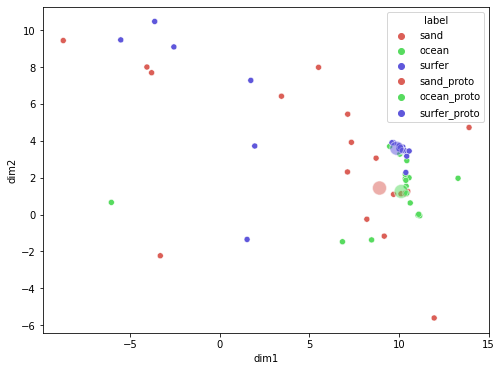

In [69]:
plot_embed(v_frame,concept_list,tsne_pca=True)

/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 4.465017080307007 seconds


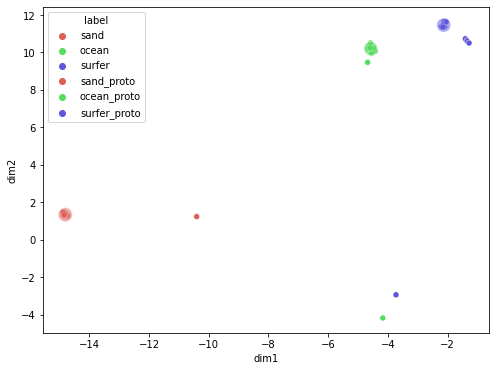

In [70]:
plot_embed(l_frame,concept_list,tsne_pca=True)

## Verbs

In [71]:
v_frame,l_frame=construct_frame_of_embeddings(vg_verb_data)

In [72]:
print(vg_verb_data["words"])

['have', 'be', 'wear', 'sit', 'stand', 'traverse', 'walk', 'attach', 'hang', 'put', 'play', 'eat', 'fly', 'watch', 'make', 'lie', 'use', 'tend', 'show', 'leave', 'state', 'swing', 'run', 'arrive', 'front', 'reach', 'pull', 'surround', 'fill', 'stay', 'reduce', 'park', 'associate', 'become', 'see', 'lead', 'float', 'wait', 'necessitate', 'talk', 'drink', 'drive', 'construct', 'read', 'write', 'close', 'travel', 'push', 'end', 'jump', 'tie', 'decorate', 'feed', 'climb', 'achieve', 'form', 'whiten', 'open', 'divide', 'work', 'discontinue', 'describe', 'enjoy', 'blacken', 'complain', 'serve', 'neglect', 'bend', 'glitter', 'chase', 'descend', 'pet', 'happen', 'punch', 'keep', 'match', 'light', 'board', 'protect', 'grip', 'try', 'sell', 'brown', 'hide', 'grok', 'meet', 'bite', 'solve', 'sniff', 'sleep', 'enter', 'gaze', 'approach', 'help', 'perform', 'give', 'herd', 'haul', 'smile', 'crash', 'visualize', 'load', 'wash', 'seat', 'pour', 'spray', 'beckon', 'row', 'yellow', 'gather', 'die', 'gl

In [73]:
# concept_list=["elephant","sheep","cow","horse"]

concept_list=["walk","run","jump"]

# concept_list=["man","woman","lady"]

/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 3.372036933898926 seconds


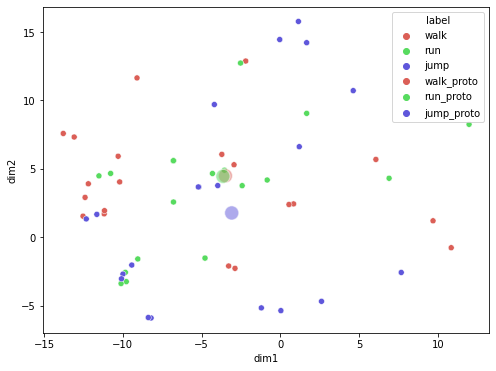

In [74]:
plot_embed(v_frame,concept_list,tsne_pca=True)

/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yuchen/miniconda3/envs/alignment/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 4.712153911590576 seconds


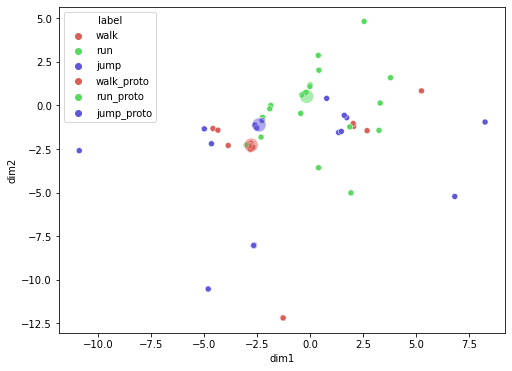

In [75]:
plot_embed(l_frame,concept_list,tsne_pca=True)